# Machine Learning behing the working of project

### Importing required libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Data Source
import yfinance as yf
import datetime as dt

# Graphing Libraries
import matplotlib.pyplot as plt

# Machine Learning Libraries
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, model_selection, svm

### Downloading the Dataframe with realtime data from API

In [2]:
df_ml = yf.download(tickers = 'AAPL', period='3mo', interval='1h')
df_ml.head()

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close  \
2022-04-18 09:30:00-04:00  163.919998  166.355499  163.570007  166.149994   
2022-04-18 10:30:00-04:00  166.149994  166.598404  164.509995  164.630005   
2022-04-18 11:30:00-04:00  164.619995  164.845306  163.690002  163.750198   
2022-04-18 12:30:00-04:00  163.750000  164.517593  163.699997  164.505005   
2022-04-18 13:30:00-04:00  164.500000  165.829605  164.429901  165.470001   

                            Adj Close    Volume  
2022-04-18 09:30:00-04:00  166.149994  18871900  
2022-04-18 10:30:00-04:00  164.630005   8329834  
2022-04-18 11:30:00-04:00  163.750198   9703100  
2022-04-18 12:30:00-04:00  164.505005   5517483  
2022-04-18 13:30:00-04:00  165.470001   7210427

### Marking the column of interest

In [3]:
# Fetching ticker values from Yahoo Finance API 
df_ml = df_ml[['Adj Close']]
df_ml.head()

Adj Close
2022-04-18 09:30:00-04:00  166.149994
2022-04-18 10:30:00-04:00  164.630005
2022-04-18 11:30:00-04:00  163.750198
2022-04-18 12:30:00-04:00  164.505005
2022-04-18 13:30:00-04:00  165.470001

### Selecting the number of days to obtain prediction result

In [4]:
#Predicting for next 100 days
forecast_out = 100 
df_ml['Prediction'] = df_ml[['Adj Close']].shift(-forecast_out)

C:\Users\Parth\AppData\Local\Temp/ipykernel_17816/3491682954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['Prediction'] = df_ml[['Adj Close']].shift(-forecast_out)


### Spliting the dataframe into training and testing dataframes

In [5]:
# Splitting data for Test and Train
X = np.array(df_ml.drop(['Prediction'],1))
X = preprocessing.scale(X)
X_forecast = X[-forecast_out:]
X = X[:-forecast_out]
y = np.array(df_ml['Prediction'])
y = y[:-forecast_out]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

C:\Users\Parth\AppData\Local\Temp/ipykernel_17816/3082014187.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df_ml.drop(['Prediction'],1))


### Applying Machine Learning Algorithm: Linear Regression

In [6]:
# Applying Linear Regression
clf = LinearRegression()
clf.fit(X_train,y_train)

LinearRegression()

### Obtaining model accuracy

In [7]:
# Prediction Score
confidence = clf.score(X_test, y_test)

### Oraganising our result in a dataframe

In [8]:
# Predicting for 'n' days stock data
forecast_prediction = clf.predict(X_forecast)
forecast = forecast_prediction.tolist()

In [9]:
pred_dict = {"Date": [], "Prediction": []}

In [10]:
for i in range(0, len(forecast)):
    pred_dict["Date"].append(dt.datetime.today() + dt.timedelta(days=i))
    pred_dict["Prediction"].append(forecast[i])

In [11]:
pred_df = pd.DataFrame(pred_dict)
pred_df

Date  Prediction
0  2022-07-18 09:47:47.728716  142.211031
1  2022-07-19 09:47:47.728716  142.230015
2  2022-07-20 09:47:47.728716  142.326510
3  2022-07-21 09:47:47.728716  142.270088
4  2022-07-22 09:47:47.728716  142.251106
..                        ...         ...
95 2022-10-21 09:47:47.728716  143.006724
96 2022-10-22 09:47:47.728716  143.015689
97 2022-10-23 09:47:47.728716  142.994533
98 2022-10-24 09:47:47.728716  143.104275
99 2022-10-25 09:47:47.728716  143.095838

[100 rows x 2 columns]

### Ploting the result on graph

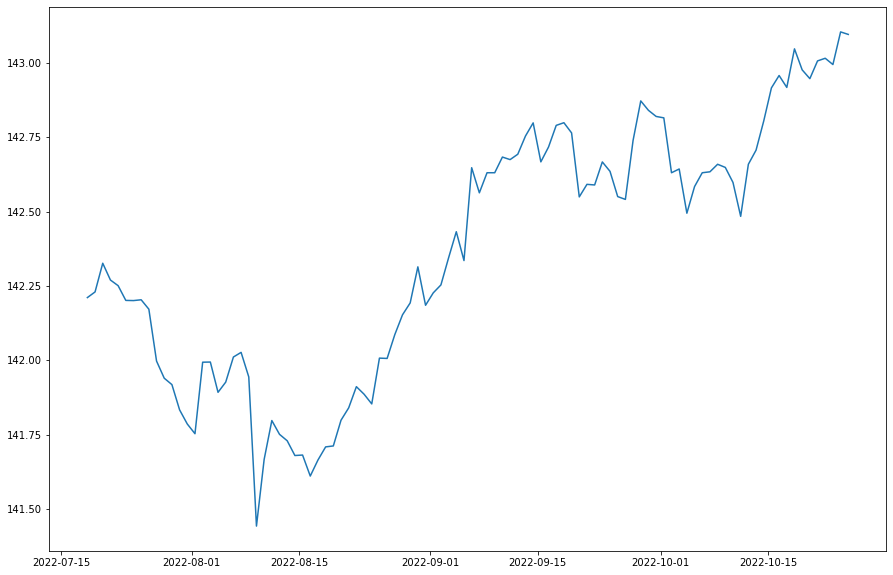

In [12]:
plt.rcParams["figure.figsize"] = (15,10)
plt.plot(pred_df['Date'], pred_df['Prediction'])
plt.show()